<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Modified_Crystal_Lattice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot unit cells from given lattice vectors and atom positions in 2D and 3D

This notebook can be used to plot unit cells of an arbitrary crystal in 2D and 3D. As an input, the user provides the lattice vectors and the positions of the atoms of a unit cell in terms of the lattice vectors. Additionally, the user can specify the number of unit cells to be plotted in x-, y- or z-direction.

**Press shift + enter to run cells!**

In [11]:
!pip install chart-studio
!pip install plotly

In [28]:
%matplotlib inline

# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chart_studio as py
import plotly.graph_objects as go
from chart_studio import *
from itertools import product
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [29]:
# Define 2d and 3d lattice coordinate functions

def unit_cell_2d(a, b, atom_pos, Nx, Ny):
    """Make arrays of x- and y-positions of a lattice from the
    lattice vectors, the atom positions and the number of unit cells.

    Parameters:
    -----------
    a : list
        First lattice vector
    b : list
        Second lattice vector
    atom_pos : list
        Positions of atoms in the unit cells in terms of a and b
    Nx : int
        number of unit cells in the x-direction to be plotted
    Ny : int
        number of unit cells in the y-direction to be plotted

    Returns:
    --------
    latt_coord_x : numpy.ndarray
        Array containing the x-coordinates of all atoms to be plotted
    latt_coord_y : numpy.ndarray
        Array containing the y-coordinates of all atoms to be plotted
    """
    latt_coord_x = []
    latt_coord_y = []
    for atom in atom_pos:
        xpos = atom[0]*a[0] + atom[1]*b[0]
        ypos = atom[0]*a[1] + atom[1]*b[1]
        xpos_all = [(xpos + n*a[0] + m*b[0]) for n, m in product(range(Nx), range(Ny))]
        ypos_all = [(ypos + n*a[1] + m*b[1]) for n, m in product(range(Nx), range(Ny))]
        latt_coord_x.append(xpos_all)
        latt_coord_y.append(ypos_all)
    latt_coord_x = np.array(latt_coord_x).flatten()
    latt_coord_y = np.array(latt_coord_y).flatten()
    return latt_coord_x, latt_coord_y


def unit_cell_3d(a, b, c, atom_pos, Nx, Ny, Nz):
    """Make arrays of x-, y- and z-positions of a lattice from the
    lattice vectors, the atom positions and the number of unit cells.

    Parameters:
    -----------
    a : list
        First lattice vector
    b : list
        Second lattice vector
    c : list
        Third lattice vector
    atom_pos : list
        Positions of atoms in the unit cells in terms of a, b and c
    Nx : int
        number of unit cells in the x-direction to be plotted
    Ny : int
        number of unit cells in the y-direction to be plotted
    Nz : int
        number of unit cells in the z-direction to be plotted

    Returns:
    --------
    latt_coord_x : numpy.ndarray
        Array containing the x-coordinates of all atoms to be plotted
    latt_coord_y : numpy.ndarray
        Array containing the y-coordinates of all atoms to be plotted
    latt_coord_z : numpy.ndarray
        Array containing the z-coordinates of all atoms to be plotted
    """
    latt_coord_x = []
    latt_coord_y = []
    latt_coord_z = []
    for atom in atom_pos:
        xpos = atom[0]*a[0] + atom[1]*b[0] + atom[2]*c[0]
        ypos = atom[0]*a[1] + atom[1]*b[1] + atom[2]*c[1]
        zpos = atom[0]*a[2] + atom[1]*b[2] + atom[2]*c[2]
        xpos_all = [xpos + n*a[0] + m*b[0] + k*c[0] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        ypos_all = [ypos + n*a[1] + m*b[1] + k*c[1] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        zpos_all = [zpos + n*a[2] + m*b[2] + k*c[2] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        latt_coord_x.append(xpos_all)
        latt_coord_y.append(ypos_all)
        latt_coord_z.append(zpos_all)
    latt_coord_x = np.array(latt_coord_x).flatten()
    latt_coord_y = np.array(latt_coord_y).flatten()
    latt_coord_z = np.array(latt_coord_z).flatten()
    return latt_coord_x, latt_coord_y, latt_coord_z

## 2D lattice plotting

In [30]:
# Honeycomb lattice

# Lattice vectors
a = [np.sqrt(3)/2., .5]
b = [np.sqrt(3)/2., -.5]

# Position of atoms in unit cell

atom_pos = [[0, 0], [1/3., 1/3.]] # Honeycomb lattice

# Number of unit cells to be plotted in x- and y-direction
Nx = 8
Ny = 8

# Find the coordinates!
latt_x, latt_y = unit_cell_2d(a, b, atom_pos, Nx, Ny)

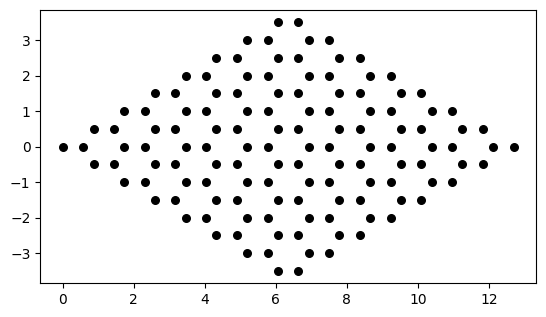

In [31]:
# Plot the resulting coordinates as a scatter plot

ax = plt.subplot(aspect=1)
ax.scatter(latt_x, latt_y, s=30, color='k', marker='o')
plt.gcf()
show_link=False

## 3D plotting

In [32]:
# FCC lattice

# Lattice vectors
a = [1, 0, 0]
b = [0, 1, 0]
c = [0, 0, 1]


# Atom positions expressed in units of a, b, and c
atom_pos = [[0, 0, 0],
             [.5, .5, 0],
             [.5, 0, .5],
             [0, .5, .5]]

# Number of unit cells to be plotted in x-, y- and z-direction
Nx = 2
Ny = 2
Nz = 2

# Find the coordinates!
latt_x, latt_y, latt_z = unit_cell_3d(a, b, c, atom_pos, Nx, Ny, Nz)

In [33]:
# Plot the coordinates as a scatter plot
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)
iplot([trace], show_link=False)